In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

df=pd.read_excel('titanic-passengers.xlsx')
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<b>First, we replace the missing values but only for Age feature because the two others feature " Cabin " and " embarked " we won't use them for this work.<br>
Next things we will transform the features survived and sex from categorical data into a numerical one.</b>

In [3]:
mean_age=round(df['Age'].mean())
df['Age'].fillna(mean_age, inplace=True)
df["Survived"]=df["Survived"].map({"No":0,"Yes":1})
df["Sex"]=df["Sex"].map({"male":0,"female":1})

In [4]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,0,3,"Gustafsson, Mr. Anders Vilhelm",0,37.0,2,0,3101276,7.9250,NaN,S
6,576,0,3,"Patchett, Mr. George",0,19.0,0,0,358585,14.5000,NaN,S
7,382,1,3,"Nakid, Miss. Maria (""Mary"")",1,1.0,0,2,2653,15.7417,NaN,C
8,228,0,3,"Lovell, Mr. John Hall (""Henry"")",0,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",1,42.0,1,0,SC/AH 3085,26.0000,NaN,S


<b>In this part, we start by splitting out data set to x for input and y for the target. Then we divide x and y to the training set and testing set. After that, we rescale our input, mostly because the range of age a fare are too big in comparison with the others feature.<br>
Now we apply the logistic regression to our dataset.</b>

In [5]:
x=df[["Pclass","Sex","Age","SibSp","Parch","Fare"]]
y=df["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print("accuracy= {}%".format(round(logreg.score(x_test,y_test),2)*100))

accuracy= 80.0%


<b>After training the model we get an accuracy of 80% which mean the model is pretty accurate for predicting if someone will survive or not but we need some further analysis of model so we can optimize it in the future and we'll be done with a confusion matrix.<br>
Now the model is trained we can proceed to the confusion matrix. We'll use the function plot_confusion_matrix from sklearn. This function will do 2 things, the first one is to calculate the confusion matrix and the second one is to plot a heatmap of the confusion matrix.</b>

Confusion matrix
[[139  23]
 [ 30  76]]


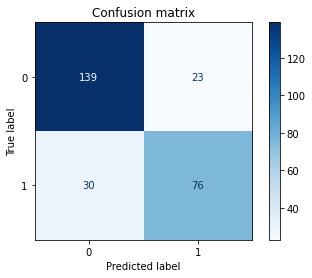

In [6]:
import numpy as np
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)

title="Confusion matrix"

disp = plot_confusion_matrix(logreg, x_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()

<b>What the confusion matrix gives us is the accuracy, the recall (out of all people which survived how many did we get correct) and finally, the precision of our model but those outputs need to be calculated manually from the confusion matrix. So for bypassing this manually work, we will use the function classification_report which gives us all of those automatically.<br>
The results give us some indications about the model. For example, we can tell that model has better precision and recall when predicting true negative in comparison with true positive.<br>
</b>

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       162
           1       0.77      0.72      0.74       106

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



<b></b>

### ROC / AUC

<b>The ROC (Receiver Operator Characteristic) curve is an evaluation metric for binary classification problems. It's a probability curve that plots the TPR against the FPR at various threshold values. The area under the curve (AUC) is the measure of a classifier's ability to distinguish between classes and is used as a summary of the ROC curve.<br> 
Also, AUC shows us the performance of the model. The higher the AUC, the better the performance of the model in distinguishing between positive and negative classes.<br>
In our case, we have an AUC of 0.79 so we can tell there is a high chance that the model will be able to differentiate the positive class values from the negative class values because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.</b>

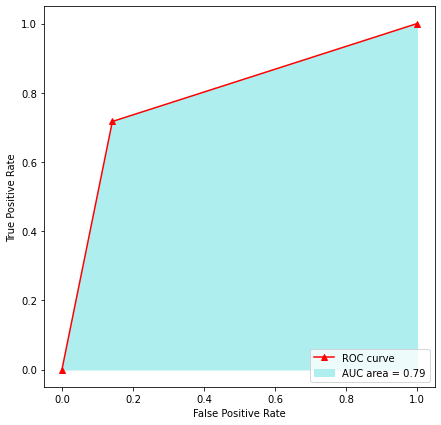

In [8]:
from sklearn.metrics import roc_curve, auc

fpr,tpr,thresholds=roc_curve(y_test,y_pred)
auc_logs=auc(fpr,tpr)

plt.figure(figsize=(7,7))
plt.plot(fpr,tpr,color='#FF0000',marker="^", label="ROC curve" % auc_logs)
plt.fill_between(fpr,tpr,color="#AFEEEE",label="AUC area = %0.2f" % auc_logs)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()